# Advance Regression Assignment
## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.<br>
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Goals of the Case Study
- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing the required libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#To show all columns/rows of a pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
#Importing & analysing the dataset
hsg_data = pd.read_csv('train.csv')
hsg_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hsg_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [4]:
hsg_data.shape

(1460, 81)

In [5]:
hsg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking null values
hsg_data.isnull().sum()[hsg_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#Checking the percentage of Null values
df_miss = pd.DataFrame((round(100*(hsg_data.isnull().sum()/len(hsg_data.index)), 2)), columns=['missing'])
df_miss.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


As observed from above list, it is safe to drop the columns of **PoolQC**, **MiscFeature**, **Alley** & **Fence** since 80-90% of the contents of these columns are null values, as they will not have any impact on the subsequent analysis.

In [8]:
#Dropping the columns that are of no use to the analysis
hsg_data.drop(["PoolQC","MiscFeature","Alley","Fence"],axis = 1, inplace=True)

For the rest of the columns with fewer missing values, let us check each column for value counts to determine how to populate the missing values with newer variables.

In [9]:
#Col:- FireplaceQu
hsg_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [10]:
#As seen from above, we can add 'No_Fireplace' to replace the null values
hsg_data['FireplaceQu'] = hsg_data['FireplaceQu'].fillna('No_Fireplace')

In [11]:
#Col:- LotFrontage
hsg_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [12]:
#As seen from above, we can add '0.0' to replace the null values
hsg_data['LotFrontage'] = hsg_data['LotFrontage'].fillna(0.0)

In [13]:
#Col:- GarageYrBlt
hsg_data.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [14]:
#We can replace null values of years with 0 for GarageYrBlt
hsg_data['GarageYrBlt'] = hsg_data['GarageYrBlt'].fillna(0)

In [15]:
#Col:- GarageCond
hsg_data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [16]:
#We can simply add 'NA' as replacement for null values in GarageCond
hsg_data['GarageCond'] = hsg_data['GarageCond'].fillna('NA')

In [17]:
#Col:- GarageType
hsg_data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [18]:
#We can replace 'NA' for null values in GarageType
hsg_data['GarageType'] = hsg_data.GarageType.fillna('NA')

In [19]:
#Col:- GarageFinish
hsg_data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
#We can replace Nan values of GarageFinish with 'NA'
hsg_data['GarageFinish'] = hsg_data.GarageFinish.fillna('NA')

In [21]:
#Col:- GarageQual
hsg_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [22]:
#We can replace null values of GarageQual with 'NA'
hsg_data['GarageQual'] = hsg_data.GarageQual.fillna('NA')

In [23]:
#Col:- BsmtFinType1
hsg_data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
#We can replace null values of BsmtFinType1 with 'NA'
hsg_data['BsmtFinType1'] = hsg_data.BsmtFinType1.fillna('NA')

In [25]:
#Col:- BsmtFinType2
hsg_data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
#We can replace null values of BsmtFinType2 with 'NA'
hsg_data['BsmtFinType2'] = hsg_data.BsmtFinType2.fillna('NA')

In [27]:
#Col:- BsmtExposure
hsg_data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [28]:
#We can replace null values of BsmtExposure with 'No'
hsg_data['BsmtExposure'] = hsg_data.BsmtExposure.fillna('No')

In [29]:
#Col:- BsmtQual
hsg_data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [30]:
#We can replace null values of BsmtQual with 'NA'
hsg_data['BsmtQual'] = hsg_data.BsmtQual.fillna('NA')

In [31]:
#Col:- BsmtCond
hsg_data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [32]:
#We can replace null values of BsmtCond with 'NA'
hsg_data['BsmtCond'] = hsg_data.BsmtCond.fillna('NA')

In [33]:
#Col:- MasVnrArea
hsg_data.MasVnrArea.value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [34]:
#We can replace null values of MasVnrArea with 0
hsg_data['MasVnrArea'] = hsg_data.MasVnrArea.fillna(0.0)

In [35]:
#Col:- MasVnrType
hsg_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
#We can replace null values of MasVnrType with 'None'
hsg_data['MasVnrType'] = hsg_data.MasVnrType.fillna('None')

In [37]:
#Col:- Electrical
hsg_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
#We can impute null values of Electrical with mode since there is huge difference between Mode and other quantities, also, there is only 1 null value, so it wont affect anywhere
hsg_data['Electrical'] = hsg_data.Electrical.fillna(hsg_data.Electrical.mode()[0])

In [39]:
#Checking the column data again to ensure all columns have same count and no null values
hsg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

plt.figure(figsize=(11,6))
sns.histplot(np.log(hsg_data["SalePrice"]))

#Checking the Correlation Matrix via Heatmap
corr_mat = hsg_data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking the Correlation Matrix")

In [40]:
#Let's look at the all numeric columns available in dtaaframe
numeric_data = hsg_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Beside the above numeric columns, 3 columns: **Street**, **PavedDrive** & **CentralAir** have categorical data that can be mapped to binary numerical format, as shown below;

In [41]:
#Converting a Categorical varible into Binary numeric datatypes
hsg_data['Street'] = hsg_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
hsg_data['CentralAir'] = hsg_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
hsg_data['PavedDrive'] = hsg_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [42]:
#Rest of the categorical data can be extracted in new dataframe:-
hsg_cat = hsg_data.select_dtypes(include=['object'])
hsg_cat.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD,Normal


In [43]:
#Lets convert these categorical columns into dummies
dummies = pd.get_dummies(hsg_cat, drop_first=True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0

In [44]:
#Dropping the 'Id' column 
df = hsg_data.drop(['Id'],axis=1)

In [45]:
#Dropping the original categorical columns from dataframe
df = df.drop(list(hsg_cat.columns), axis=1)

In [46]:
#Merging the dummy categorical columns to original dataset
df = pd.concat([df,dummies], axis=1)

In [47]:
df.shape
df.describe()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0

In [48]:
#Train_Test Split
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [49]:
#Train_Test data split
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice", 1)

y_test = np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice", 1)

In [50]:
#Lets again find numerical data colums from X_train
num_values = X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [51]:
#Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### Now let us move onto Model Building

In [52]:
#Building a Regression model:-
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [53]:
#Calculating the RFE
rfe = RFE(reg,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [54]:
#Selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtFinType1_NA',
       'GarageType_NA', 'GarageFinish_NA', 'GarageQual_Gd', 'GarageQual_NA',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Po', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [55]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          6.98e-225
Time:                        22:26:19   Log-Likelihood:                 50.951
No. Observations:                1021   AIC:                            -69.90
Df Residuals:                    1005   BIC:                             8.954
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.8614      0.049    240.167      0.000      11.764      11.958
BsmtFinSF1                0.0496      0.007      7.135      0.000       0.036       0.063
BsmtFinSF2                0.0050      0.007      0.674      0.500      -0.009       0.019
BsmtUnfSF                 0.0231      0.007      3.201      0.001       0.009       0.037
TotalBsmtSF               0.0746      0.012      6.372      0.000       0.052       0.098
1stFlrSF                  0.0654      0.012      5.514      0.000       0.042       0.089
2ndFlrSF                  0.0766      0.007     11.503      0.000       0.063       0.090
LowQualFinSF             -0.0223      0.007     -2.996      0.003      -0.037      -0.008
GrLivArea                 0.1096      0.006     18.198      0.000       0.098       0.121
Exterior1st_AsphShn       0.0360      0.120      0.301      0.763      -0.199       0.271
Exterior1st_CBlock       -0.1862      0.116     -1.603      0.109      -0.414       0.042
Exterior2nd_AsphShn       0.0360      0.120      0.301      0.763      -0.199       0.271
Exterior2nd_CBlock       -0.1862      0.116     -1.603      0.109      -0.414       0.042
Exterior2nd_Other     -5.132e-16   3.35e-17    -15.324      0.000   -5.79e-16   -4.47e-16
BsmtQual_NA              -0.0337      0.020     -1.697      0.090      -0.073       0.005
BsmtCond_NA              -0.0337      0.020     -1.697      0.090      -0.073       0.005
BsmtFinType1_NA          -0.0337      0.020     -1.697      0.090      -0.073       0.005
GarageType_NA            -0.0410      0.020     -2.093      0.037      -0.079      -0.003
GarageFinish_NA          -0.0410      0.020     -2.093      0.037      -0.079      -0.003
GarageQual_Gd             0.2402      0.092      2.607      0.009       0.059       0.421
GarageQual_NA            -0.0410      0.020     -2.093      0.037      -0.079      -0.003
GarageQual_TA             0.1757      0.050      3.529      0.000       0.078       0.273
GarageCond_Fa            -0.1936      0.054     -3.580      0.000      -0.300      -0.087
GarageCond_Po            -0.1490      0.115     -1.295      0.196      -0.375       0.077
SaleType_New              0.1053      0.014      7.322      0.000       0.077       0.134
SaleCondition_Partial     0.1053      0.014      7.322      0.000       0.077       0.134
==============================================================================
Omnibus:                      891.172   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68108.381
Skew:                          -3.560   Prob(JB):                         0.00
Kurtosis:                      42.374   Cond. No.                     1.68e+16
==============================================================================

In [57]:
#Ridge Regression
#Lets formulate a list of 'alphas' to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()

#To try crossvalidation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.0910187794867795


In [59]:
#Lets look at the results table for our reqd alpha values
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017996,5.215130e-03,0.004999,6.322593e-04,0.0001,{'alpha': 0.0001},-0.089570,-0.095788,-0.095430,-0.097928,-0.082901,-0.092323,0.005467,15,-0.055064,-0.055284,-0.056011,-0.057452,-0.056155,-0.055993,0.000839
1,0.015197,1.469412e-03,0.004799,7.480868e-04,0.001,{'alpha': 0.001},-0.089490,-0.095763,-0.095456,-0.097439,-0.082791,-0.092188,0.005415,11,-0.055121,-0.055291,-0.056071,-0.057503,-0.056214,-0.056040,0.000846
2,0.014997,1.548804e-03,0.004999,6.327868e-04,0.01,{'alpha': 0.01},-0.089724,-0.095536,-0.095729,-0.093889,-0.083263,-0.091628,0.004707,8,-0.056216,-0.055366,-0.056938,-0.058191,-0.057211,-0.056784,0.000951
3,0.014997,1.788458e-03,0.004999,1.784161e-07,0.05,{'alpha': 0.05},-0.092629,-0.094822,-0.098369,-0.088079,-0.087226,-0.092225,0.004168,12,-0.060242,-0.055793,-0.060339,-0.061827,-0.061276,-0.059895,0.002135
4,0.014597,1.199532e-03,0.005199,9.799196e-04,0.1,{'alpha': 0.1},-0.094597,-0.094345,-0.099983,-0.086364,-0.090632,-0.093184,0.004530,17,-0.062765,-0.056252,-0.062552,-0.064717,-0.063848,-0.062027,0.002991
5,0.014397,4.895901e-04,0.004799,3.999473e-04,0.2,{'alpha': 0.2},-0.096507,-0.094053,-0.100943,-0.085109,-0.092861,-0.093895,0.005192,24,-0.065181,-0.056942,-0.064523,-0.067566,-0.066421,-0.064127,0.003741
6,0.015397,1.743100e-03,0.004599,4.898236e-04,0.3,{'alpha': 0.3},-0.097283,-0.093867,-0.101342,-0.084001,-0.093382,-0.093975,0.005746,26,-0.066452,-0.057499,-0.065540,-0.069026,-0.067870,-0.065277,0.004068
7,0.014397,1.019534e-03,0.004999,2.431402e-07,0.4,{'alpha': 0.4},-0.097567,-0.093956,-0.101539,-0.083102,-0.093350,-0.093903,0.006143,25,-0.067340,-0.058019,-0.066178,-0.069986,-0.068831,-0.066071,0.004228
8,0.014796,7.476912e-04,0.005799,1.165885e-03,0.5,{'alpha': 0.5},-0.097601,-0.094065,-0.101604,-0.082714,-0.093207,-0.093838,0.006303,23,-0.068050,-0.058485,-0.066677,-0.070705,-0.069544,-0.066692,0.004323
9,0.014397,8.006335e-04,0.004799,4.002095e-04,0.6,{'alpha': 0.6},-0.097544,-0.094113,-0.101606,-0.082450,-0.093117,-0.093766,0.006393,22,-0.068633,-0.058909,-0.067070,-0.071276,-0.070109,-0.067199,0.004379


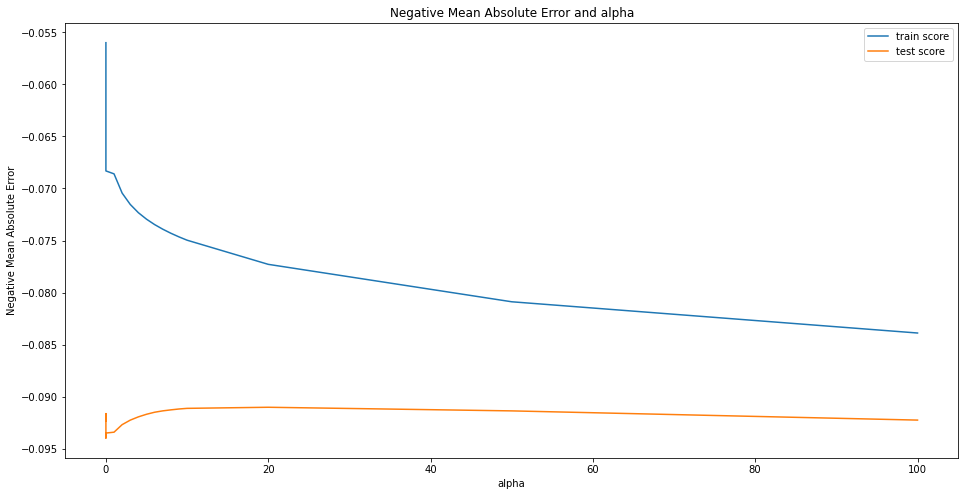

In [60]:
#Plotting the mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,8))

#Plot characs
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
#Choosing the final ridge regression model with the best alpha parameter:-
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.18310914e-02, -7.72276552e-03,  1.88997655e-02,  8.11358399e-03,
        8.41409598e-02,  4.10456028e-02,  3.47895897e-02,  2.24504317e-02,
       -6.92517126e-04, -5.54641829e-04,  6.95576090e-03,  6.10594048e-03,
        7.99332572e-03,  1.49628852e-02,  3.49963049e-02,  3.98114143e-02,
        1.48271359e-03,  5.88894658e-02,  3.10170490e-02,  3.18980760e-03,
        2.02157386e-02,  1.23482107e-02,  1.21902973e-02, -1.15847970e-02,
        1.71743619e-02,  5.55332861e-03, -6.06510221e-04,  4.11005128e-02,
        5.69225170e-03,  2.89485136e-03,  1.29358844e-02, -2.67821606e-03,
        8.34156389e-03,  7.48267222e-03,  1.08063262e-02, -1.65847330e-02,
       -2.20212550e-03, -1.53698606e-03, -7.60114365e-03,  3.68918720e-02,
        2.09613849e-02,  4.38252749e-02, -9.64546191e-03,  1.98246882e-02,
       -3.64313099e-02,  4.63354227e-03,  2.64858383e-02,  2.28325197e-02,
        3.24338614e-02, -7.50218363e-03,  2.97323374e-02, -2.80896777e-02,
       -4.75436323e-03, -

In [62]:
#Predicting the R-squared value on train dataset
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9141797164358061


In [63]:
#Predicting the R-squared value on test dataset
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8879307100518053


In [64]:
#Checking the RMSE value
mean_squared_error(y_test, y_test_pred)

0.018439894027287292

In [65]:
#Lasso Regression
lasso = Lasso()
params = {'alpha': [0.00005, 0.0001, 0.001, 0.005, 0.01]}

#Try cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
#Check the crossvalidation results
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [67]:
#Printing the best hyperparameter alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08722914169320989


In [68]:
#Finalising the Lasso model with best alpha param:-
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.25750036e-02, -4.31492243e-03,  2.10402489e-02,  3.44692259e-03,
        6.57329086e-02,  3.86453564e-02,  4.45445922e-02,  2.29970560e-02,
       -1.56064396e-04,  5.78453127e-03,  5.07220223e-03, -0.00000000e+00,
        2.45794063e-02,  1.53846094e-02,  7.61254698e-02,  8.35256022e-02,
        5.08830581e-03,  3.24615914e-02,  2.23650705e-02,  1.59584343e-03,
        1.06030786e-02,  5.23023848e-03,  8.81326395e-03, -1.12361694e-02,
        4.99836053e-03, -7.12884904e-03,  1.05837023e-03,  3.51219004e-02,
        4.82063730e-03,  2.71234837e-03,  1.00272609e-02,  4.18843068e-03,
        7.15902746e-03,  5.82934835e-03,  8.63979954e-03, -8.75893311e-03,
       -2.18034771e-03, -8.39515954e-04, -4.14001156e-03,  3.31651603e-01,
        3.35619549e-01,  3.36304045e-01,  2.89575263e-01,  1.09420208e-02,
       -7.63499079e-02,  7.38229644e-03,  2.97038549e-02,  4.13669801e-02,
        3.87961474e-02, -3.32851726e-02,  3.59604183e-02, -4.37924571e-02,
       -0.00000000e+00, -

In [69]:
#Predicting the R-squared value for Training data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9466898149342141


In [70]:
#Predicting the R-squared value for Test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8773326636289012


In [71]:
#Finding the RMSE value
mean_squared_error(y_test, y_test_pred)

0.020183697820681207

In [72]:
lasso.coef_

array([-2.25750036e-02, -4.31492243e-03,  2.10402489e-02,  3.44692259e-03,
        6.57329086e-02,  3.86453564e-02,  4.45445922e-02,  2.29970560e-02,
       -1.56064396e-04,  5.78453127e-03,  5.07220223e-03, -0.00000000e+00,
        2.45794063e-02,  1.53846094e-02,  7.61254698e-02,  8.35256022e-02,
        5.08830581e-03,  3.24615914e-02,  2.23650705e-02,  1.59584343e-03,
        1.06030786e-02,  5.23023848e-03,  8.81326395e-03, -1.12361694e-02,
        4.99836053e-03, -7.12884904e-03,  1.05837023e-03,  3.51219004e-02,
        4.82063730e-03,  2.71234837e-03,  1.00272609e-02,  4.18843068e-03,
        7.15902746e-03,  5.82934835e-03,  8.63979954e-03, -8.75893311e-03,
       -2.18034771e-03, -8.39515954e-04, -4.14001156e-03,  3.31651603e-01,
        3.35619549e-01,  3.36304045e-01,  2.89575263e-01,  1.09420208e-02,
       -7.63499079e-02,  7.38229644e-03,  2.97038549e-02,  4.13669801e-02,
        3.87961474e-02, -3.32851726e-02,  3.59604183e-02, -4.37924571e-02,
       -0.00000000e+00, -

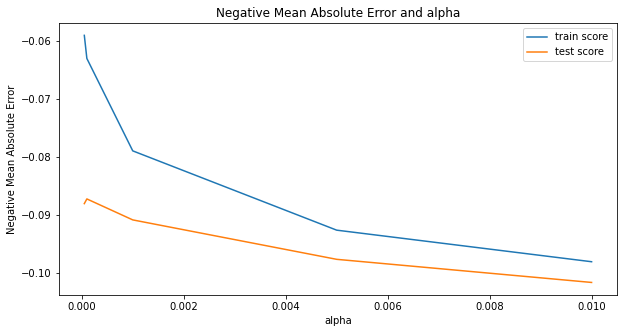

In [74]:
#Plotting the mean train & test scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(10,5))

#Plot characs
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
#Checking the best alpha param for the ridge model:-
model_cv.best_params_

{'alpha': 20}

In [78]:
#Checking the R2 scores for Train & Test data again for ridge model:-
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9141797164358061
0.8879307100518053


In [79]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [80]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.835629
5,OverallCond,0.084141
62,Neighborhood_Crawfor,0.080840
72,Neighborhood_NridgHt,0.065984
18,BsmtFullBath,0.058889
77,Neighborhood_Somerst,0.054882
82,Condition1_Norm,0.052564
42,MSZoning_RL,0.043825
121,Exterior1st_BrkFace,0.043625
171,BsmtExposure_Gd,0.042184


In [81]:
#Checking the R2 scores for Train & Test data again for lasso model:-
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9466898149342141
0.8773326636289012


### Best alpha value for Lasso = 0.0001
### Best alpha value for Ridge = 20

### As evident from above, comparing both the models, the below Features best explain the Dataset;-

- MSSubClass
- OverallCond
- Neighborhood_Crawfor
- Neighborhood_NridgHt
- BsmtFullBath
- Neighborhood_Somerst
- Condition1_Norm
- MSZoning_RL
- Exterior1st_BrkFace
- BsmtExposure_Gd
- RoofMatl_WdShngl

### Q1: Double the values of Alpha for Ridge & Lasso:-

In [95]:
#Prev alpha of 20 for Ridge now becomes = 40
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

print(ridge.coef_)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

[-2.06727378e-02 -6.76955526e-03  1.83391496e-02  8.65081677e-03
  8.55509763e-02  4.09966909e-02  3.35968981e-02  2.33514232e-02
  1.55597623e-03  2.16409196e-03  6.51594925e-03  6.66311210e-03
  1.11272019e-02  1.49551428e-02  3.36189166e-02  3.51758074e-02
  1.58466386e-03  5.40753817e-02  3.08752322e-02  3.32392035e-03
  2.19537795e-02  1.35435091e-02  1.13335415e-02 -1.11571866e-02
  1.96397666e-02  1.13750985e-02 -2.20338641e-04  3.88798372e-02
  9.89897867e-03  4.11612073e-03  1.31229126e-02 -2.54825321e-03
  7.38721947e-03  7.31262122e-03  1.08668218e-02 -1.78673648e-02
 -2.37535461e-03 -1.21133303e-03 -8.07880479e-03  2.68015428e-02
  1.08609788e-02  3.25289535e-02 -2.08864192e-02  1.41250993e-02
 -2.44603282e-02  1.67624569e-03  1.64140486e-02  1.49437813e-02
  2.03619068e-02 -4.13638018e-03  2.42183486e-02 -1.81120554e-02
 -2.50081146e-03 -4.23022598e-03  1.86518848e-02 -7.68705773e-04
 -1.29173835e-03 -1.14848919e-02  1.40451960e-02  2.51461421e-02
 -1.37716759e-02  5.64470

- Coeff values are increasing slightly as alpha increases.
- r2_score for train data reduced slightly from 0.9141 to 0.9071
- r2_score for test data reduced slightly from 0.8879 to 0.8860

In [97]:
#Prev alpha of 0.0001 for Lasso now becomes = 0.0002
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

print(lasso.coef_)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

[-2.53604657e-02 -6.60145453e-03  1.96297974e-02  3.54608714e-03
  7.27907005e-02  3.88796153e-02  3.86752190e-02  2.24616130e-02
 -2.07120464e-03 -0.00000000e+00  4.34206745e-03  3.96984261e-03
  4.52000858e-03  1.52613329e-02  1.02164745e-02  1.07033310e-02
 -2.74188736e-03  1.18640601e-01  2.83805114e-02  2.82016897e-03
  1.51475698e-02  7.46529633e-03  1.00071093e-02 -8.91628380e-03
  7.21280567e-03 -9.24618881e-03  0.00000000e+00  4.35862571e-02
 -1.56075887e-03  2.78192619e-03  1.09788583e-02  2.23236856e-03
  8.40243082e-03  5.87810718e-03  1.00366065e-02 -1.55227534e-02
 -2.21656507e-03 -8.67225564e-04 -5.24834164e-03  2.41348041e-01
  2.43956678e-01  2.51528835e-01  2.02772135e-01  1.40957841e-02
 -1.11019113e-01  8.46528487e-03  3.22193179e-02  4.41251677e-02
  4.34207653e-02 -0.00000000e+00  3.75352609e-02 -4.15177480e-02
 -0.00000000e+00 -4.32590913e-03  1.04416663e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.51261541e-02  8.62884500e-02
  1.52783210e-03  1.52096

- As alpha value increased more features removed from model.
- r2_score dropped from 0.9466 to 0.9326 for train data.
- r2_score dropped from 0.8773 to 0.8755 for train data.

In [98]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [99]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.889396
5,OverallCond,0.085551
62,Neighborhood_Crawfor,0.056447
18,BsmtFullBath,0.054075
72,Neighborhood_NridgHt,0.047362
82,Condition1_Norm,0.044880
6,YearBuilt,0.040997
77,Neighborhood_Somerst,0.039520
28,GarageArea,0.038880
16,LowQualFinSF,0.035176
